# Revenue Analysis for Megaline

## Introduction

The present document comprises of an analysis of revenue from users in the plans 'Surf' and 'Ultimate' of Megaline Company. Data for all calls, messages and internet sessions for each user has been gathered and will now be analyzed in order to find out the average revenue per plan, consumer patterns and average revenue per user. This research has been done as a part of the advertising budget analysis in order to assist the marketing team on the decision making process.

The main sections in this report are:
- Proprocessing, where we validate and prepare data for analysis.
- Analysis, where we create hypothesis about the data while drawing conclusions.
- Hypothesis testing, where we test these hypothesis to check if they are reasonable.
- Conclusion, summing up the knowledge researched.

## Preprocessing Data

### Introduction

The first step is to explore data and validate information. Our final objective is to delineate patterns between consumers from the two different plans: are these consumers need very different? Which one brings more revenue?

Data often comes with a few unpredicted issues, and these will be fixed in this preprocessing section. These can include missing values, wrong values and incorrect data types. Analysis is much easier when the data is standardized and categorized. At the end of this section, we expect to have data ready for analysis and the drawing of results.

### General Information

#### Explanation

Five tables were provided:

- Plans: with information about each of Megaline's plans analyzed.
- Users: containing details about the users, including ID, name, location and plan registry date.
- Calls: each call has a specific ID associated with a user ID.
- Messages: how many messages have been sent for each user.
- Internet: data rates for each user stored in sessions.

We will first load them partially, check data types and reload them correctly parsed. Then, we will check if there are any duplicates, artifacts or missing data.

#### Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import SnowballStemmer, WordNetLemmatizer

try:
    pd.read_csv('megaline_calls.csv', nrows=1)
    CSVPATH = ''
except:
    pass

try:
    pd.read_csv('/megaline_calls.csv', nrows=1)
    CSVPATH = '/'
except:
    pass

try:
    pd.read_csv('/datasets/megaline_calls.csv', nrows=1)
    CSVPATH = '/datasets/'
except:
    pass

try:
    pd.read_csv('./datasets/megaline_calls.csv', nrows=1)
    CSVPATH = './datasets/'
except:
    pass

print('Path found is', CSVPATH)

def optimize_types(df):
    df_dtypes = df.dtypes
    df_names = df.index
    df_types = [i.name for i in df_dtypes.values]
    df_types = dict(zip(df_names, df_types))

Path found is ./datasets/


In [2]:
calls = pd.read_csv(CSVPATH+'megaline_calls.csv', nrows=5)

calls['user_id'] = pd.to_numeric(calls['user_id'], downcast='unsigned')
calls['duration'] = pd.to_numeric(calls['duration'], downcast='float')

calls_types = optimize_types(calls)

calls = pd.read_csv(
    CSVPATH+'megaline_calls.csv', 
    dtype=calls_types, 
    parse_dates=['call_date'],
    infer_datetime_format='%Y-%m-%d')

calls.info()

print('\nNumber of duplicates in calls:', calls[calls.duplicated()].size, '\n\n')

print('Description of dataset "calls":')
display(calls[['call_date']].describe())


print('Head of dataset "calls":')
display(calls.describe())

display(calls.head())

print('Number of calls with zero duration:',
      calls[calls['duration'] == 0]['duration'].count(),
      'of', 
      calls['duration'].count()
     )

calls[calls['duration'] == 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

Number of duplicates in calls: 0 


Description of dataset "calls":


<ipython-input-2-3b1597f34e9c>:19: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(calls[['call_date']].describe())


,call_date
count,137735
unique,351
top,2018-12-27 00:00:00
freq,1091
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


Head of dataset "calls":


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Number of calls with zero duration: 26834 of 137735


,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [3]:
internet = pd.read_csv(CSVPATH+'megaline_internet.csv', nrows=5)

internet['user_id'] = pd.to_numeric(internet['user_id'], downcast='unsigned')
internet['mb_used'] = pd.to_numeric(internet['mb_used'], downcast='float')

internet_types = optimize_types(internet)

internet = pd.read_csv(
    CSVPATH+'megaline_internet.csv', 
    dtype=internet_types, 
    parse_dates=['session_date'],
    infer_datetime_format='%Y-%m-%d')

internet.info()

print('\nNumber of duplicates in internet:', internet[internet.duplicated()].size, '\n\n')

print('Description of dataset "internet":')
display(internet[['session_date']].describe())
display(internet[['user_id', 'mb_used']].describe())

print('Head of dataset "internet":')
display(internet.head())

print('Number of sessions with zero mb_used:',
      internet[internet['mb_used'] == 0]['mb_used'].count(),
      'of', 
      internet['mb_used'].count()
     )

internet[internet['mb_used'] == 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

Number of duplicates in internet: 0 


Description of dataset "internet":


<ipython-input-3-b36c23f59f3e>:19: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(internet[['session_date']].describe())


,session_date
count,104825
unique,351
top,2018-12-24 00:00:00
freq,851
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Head of dataset "internet":


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Number of sessions with zero mb_used: 13747 of 104825


,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


In [4]:
messages = pd.read_csv(CSVPATH+'megaline_messages.csv', nrows=5)

messages['user_id'] = pd.to_numeric(messages['user_id'], downcast='unsigned')

messages_types = optimize_types(messages)

messages = pd.read_csv(
    CSVPATH+'megaline_messages.csv', 
    dtype=messages_types, 
    parse_dates=['message_date'],
    infer_datetime_format='%Y-%m-%d')

messages.info()

print('\nNumber of duplicates in messages:', messages[messages.duplicated()].size, '\n\n')

print('Description of dataset "messages":')
display(messages[['message_date']].describe())

print('Head of dataset "messages":')
display(messages.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB

Number of duplicates in messages: 0 


Description of dataset "messages":


<ipython-input-4-7604292c03ba>:18: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(messages[['message_date']].describe())


,message_date
count,76051
unique,351
top,2018-12-28 00:00:00
freq,702
first,2018-01-15 00:00:00
last,2018-12-31 00:00:00


Head of dataset "messages":


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [5]:
plans = pd.read_csv(CSVPATH+'megaline_plans.csv')

plans.info()

plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
users = pd.read_csv(CSVPATH+'megaline_users.csv', nrows=5)

users['user_id'] = pd.to_numeric(users['user_id'], downcast='unsigned')
users['age'] = pd.to_numeric(users['age'], downcast='unsigned')
users['plan'] = users['plan'].astype('category')

users_dtypes = users.dtypes
users_names = users.index
types = [i.name for i in users_dtypes.values]
users_types = dict(zip(users_names, types))

users = pd.read_csv(
    CSVPATH+'megaline_users.csv', 
    dtype=users_types, 
    parse_dates=['reg_date', 'churn_date'],
    infer_datetime_format='%Y-%m-%d')

users.info()

print('\nNumber of duplicates is users:', users[users.duplicated()].size)
print()
print('Unique values in plan:', users['plan'].unique())
print()
display(users[['reg_date', 'churn_date']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    uint16        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    uint8         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(4), uint16(1), uint8(1)
memory usage: 25.0+ KB

Number of duplicates is users: 0

Unique values in plan: ['ultimate' 'surf']



<ipython-input-6-c7d3c2b54727>:24: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(users[['reg_date', 'churn_date']].describe())
<ipython-input-6-c7d3c2b54727>:24: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(users[['reg_date', 'churn_date']].describe())


,reg_date,churn_date
count,500,34
unique,266,29
top,2018-07-12 00:00:00,2018-12-18 00:00:00
freq,5,3
first,2018-01-01 00:00:00,2018-07-31 00:00:00
last,2018-12-31 00:00:00,2018-12-31 00:00:00


#### Results

We have correctly loaded the data in each table with their associated data types. Numeric values have been loaded as integers and floats and dates as datetime objects. We have checked every table for duplicates and also artifacts (incorrect values).

For about 20% of the calls and 10% of the internet sessions, we could see zero values for duration and megabytes used, respectively. There are many possible reasons, but they could be related to unanswered or ignored calls or starting an internet connection without really spending mobile data. Another possible reason is that some websites might not be charged in mobile data for services associated with Megaline. Those values were not altered because they won't show up as issues when monthly rates per user are calculated.

The only missing values present are on the churn dates of users, which have been left as null to maintain the datetime characteristic of the column, leaving the missing values as 'NaT'. Keeping missing values on the 'churn_date' column was probably intentional, because users who didn't terminate their plans should not have a date there.

### Calculation: defining monthly bills

#### Explanation

The second step is to make a few calculations based on data. Getting to know which specific month does a call, message or internet session belong to is vital for correct visualization of revenue. For example, if the billing date of a user is February 15, a call that has been done in March 3 should be considered as done in February, because it is not past the billing date. Therefore, we took into account the registry date as a reference for the billing date.

We also expect to sum all chargeable values per month for each user, reminding that partial minutes as counted as whole minutes for calls, and partial megabytes are counted as whole gigabytes for internet session data rates.

#### Code

In [7]:
def decide_month(row):
    result = row['call_date'].month
    if row['call_date'].day < row['reg_date'].day:
        result = row['call_date'].month - 1
    elif row['call_date'].day >= row['reg_date'].day:
        pass
    if result < 1:
        raise
    return result

In [8]:
users_merge = ['user_id', 'reg_date']
calls = calls.merge(users[users_merge], on='user_id', how='left')
calls['call_month'] = calls.apply(decide_month, axis=1)

monthly_calls_count_user = calls.pivot_table(index='user_id', columns='call_month', values='id', aggfunc='count').fillna(0).astype('int')
monthly_calls_count_user = monthly_calls_count_user.apply(lambda x: [x[i] for i in range(1,13)], axis=1)
monthly_calls_count_user.name = 'calls'
monthly_calls_count_user.head()

user_id
1000           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16]
1001       [0, 0, 0, 0, 0, 0, 0, 47, 44, 72, 66, 32]
1002         [0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 49, 15]
1003         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 109, 40]
1004    [0, 0, 0, 0, 51, 53, 44, 47, 57, 50, 48, 20]
Name: calls, dtype: object

In [9]:
calls['duration_charged'] = calls['duration'].apply(np.ceil)
monthly_duration_charged_user = calls.pivot_table(index='user_id', columns='call_month', values='duration_charged', aggfunc='sum').fillna(0).astype('int')
monthly_duration_charged_user = monthly_duration_charged_user.apply(lambda x: [x[i] for i in range(1,13)], axis=1)
monthly_duration_charged_user.name = 'duration'
monthly_duration_charged_user.head()

user_id
1000               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124]
1001       [0, 0, 0, 0, 0, 0, 0, 296, 279, 457, 450, 246]
1002           [0, 0, 0, 0, 0, 0, 0, 0, 0, 319, 377, 133]
1003             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 772, 332]
1004    [0, 0, 0, 0, 407, 387, 312, 303, 382, 420, 423...
Name: duration, dtype: object

In [10]:
messages = messages.merge(users[users_merge], on='user_id', how='left')
messages['message_month'] = messages['message_date'].apply(lambda x: x.month)

monthly_messages_user = messages.pivot_table(index='user_id', columns='message_month', values='id', aggfunc='count').fillna(0).astype('int')
monthly_messages_user = monthly_messages_user.apply(lambda x: [x[i] for i in range(1,13)], axis=1)
monthly_messages_user.name = 'messages'
monthly_messages_user.head()

user_id
1000          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11]
1001      [0, 0, 0, 0, 0, 0, 0, 30, 44, 53, 36, 44]
1002        [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 32, 41]
1003          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50]
1004    [0, 0, 0, 0, 7, 18, 26, 25, 21, 24, 25, 31]
Name: messages, dtype: object

In [11]:
internet = internet.merge(users[users_merge], on='user_id', how='left')
internet['session_month'] = internet['session_date'].apply(lambda x: x.month)

monthly_internet_user = internet.pivot_table(index='user_id', columns='session_month', values='mb_used', aggfunc='sum').fillna(0)
monthly_internet_user = (np.ceil(monthly_internet_user/1024)).astype('uint')
monthly_internet_user = monthly_internet_user.apply(lambda x: [x[i] for i in range(1,13)], axis=1)
monthly_internet_user.name = 'internet'
monthly_internet_user.head()

user_id
1000           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
1001       [0, 0, 0, 0, 0, 0, 0, 7, 14, 22, 19, 19]
1002         [0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 19, 15]
1003          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27]
1004    [0, 0, 0, 0, 7, 21, 24, 28, 19, 15, 22, 21]
Name: internet, dtype: object

In [12]:
tent_df = pd.concat([
    monthly_calls_count_user, 
    monthly_duration_charged_user, 
    monthly_messages_user,
    monthly_internet_user
    ], axis=1)

In [13]:
users['reg_month'] = users['reg_date'].apply(lambda x: x.month)
users['churn_month'] = users['churn_date'].apply(lambda x: x.month)
plan_columns = ['plan', 'reg_date', 'reg_month', 'churn_month', 'user_id']

In [14]:
df = tent_df.merge( users[plan_columns] , on='user_id', how='outer')
monthly = ['calls', 'duration', 'messages', 'internet']

zeros = [0 for x in range(1,13)]

for col in df[monthly]:
    for row in df.loc[getattr(df, col).isna(), col].index:
        df.at[row, col] = zeros

df['churn_month'] = df['churn_month'].fillna(0).astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   calls        500 non-null    object        
 2   duration     500 non-null    object        
 3   messages     500 non-null    object        
 4   internet     500 non-null    object        
 5   plan         500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   reg_month    500 non-null    int64         
 8   churn_month  500 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 55.2+ KB


#### Results

After categorizing months and grouping data based on users, we have a single dataframe with the most relevant information to calculate billing prices. The missing values have been dealt with in the process, but during this work they may prove relevant to calculate means in an easier way. We have monthly total chargeable counts for calls, durations, . Each of these columns contain ordered lists for each month of 2018, starting from January to December. It is important to note that the data for December has a flaw in that only users billed in first day of each month could have all their data from December displayed, as information from January 2019 is not available.

### Calculation: monthly revenues per user

#### Explanation

Now that we have vectors with the information of calls for each month, we can create a single function to calculate the total expense from the resulting dataframe of the last subsection. We need to take into account when billing the registry month and churn months, to correctly assign plan values. We expect to add a column for monthly bills with a 12-element list similar to calls, duration, messages and internet.

#### Code

In [15]:
def total_paid_by_user_per_month(row):

    # Select plan row in dataframe plan
    plan_row = plans[ plans['plan_name'] == row['plan']].reset_index(drop=True)
    
    # Create a list containing exceeded minutes based on plan row
    exceed_minutes = [ 
        (x - plan_row.iloc[0]['minutes_included'] ) 
        if (x >= plan_row.iloc[0]['minutes_included']) 
        else 0 
        for x in row['duration'] 
        ]

    # Create a list containing exceeded messages based on plan row
    exceed_messages = [ 
        (x - plan_row.iloc[0]['messages_included'] ) 
        if (x >= plan_row.iloc[0]['messages_included']) 
        else 0 
        for x in row['messages'] 
        ]

    # Create a list containing exceeded data rates based on plan row
    exceed_internet = [ 
        (x - plan_row.iloc[0]['mb_per_month_included'] ) 
        if (x >= plan_row.iloc[0][ 'mb_per_month_included']) 
        else 0 
        for x in row['internet'] 
        ]

    # Create a list with the monthly rates for the months billed
    monthly_value_paid = [ 
        plan_row.iloc[0]['usd_monthly_pay'] 
        if (x >= row['reg_month']) and ((row['churn_month'] == 0) or (x < row['churn_month'] or (row['churn_month'] == row['reg_month'])))
        else 0
        for x in range(1, 13)
        ]
    
    # Create a list by multiplying previous lists for their weighs in plan row and sum it all up
    total_paid = [
        (
            exceed_minutes[x]*plan_row.iloc[0]['usd_per_minute'] +
            exceed_messages[x]*plan_row.iloc[0]['usd_per_message'] +
            exceed_internet[x]*plan_row.iloc[0]['usd_per_gb'] +
            monthly_value_paid[x]            
        )
        if (row['churn_month'] == 0) or (x < row['churn_month'] - 1) or (row['churn_month'] == row['reg_month'])
        else 0
        for x in range(0, 12)
    ]

    # Return the list with monthly values paid
    return total_paid



In [16]:
df['total_paid'] = df.apply(total_paid_by_user_per_month, axis=1)

In [17]:
backup_df = df
df = df[['user_id', 'duration', 'messages', 'internet', 'total_paid', 'plan']]

In [18]:
df = df.set_index('user_id')

In [19]:
user_duration = pd.DataFrame(df.duration.tolist(), index=df.index, columns=[str(i) for i in range(1,13)]).replace(0, np.NaN).join(df[['plan']])
user_messages = pd.DataFrame(df.messages.tolist(), index=df.index, columns=[str(i) for i in range(1,13)]).replace(0, np.NaN).join(df[['plan']])
user_internet = pd.DataFrame(df.internet.tolist(), index=df.index, columns=[str(i) for i in range(1,13)]).replace(0, np.NaN).join(df[['plan']])
user_paid = pd.DataFrame(df.total_paid.tolist(), index=df.index, columns=[str(i) for i in range(1,13)]).replace(0, np.NaN).join(df[['plan']])

In [20]:
user_paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1473
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       49 non-null     float64
 1   2       91 non-null     float64
 2   3       131 non-null    float64
 3   4       176 non-null    float64
 4   5       214 non-null    float64
 5   6       268 non-null    float64
 6   7       303 non-null    float64
 7   8       348 non-null    float64
 8   9       376 non-null    float64
 9   10      414 non-null    float64
 10  11      443 non-null    float64
 11  12      469 non-null    float64
 12  plan    500 non-null    object 
dtypes: float64(12), object(1)
memory usage: 70.9+ KB


#### Results

As we expected, the dataframe now contains monthly bills per user for the whole year in the column 'total_paid'. However, using lists can be a little tricky in the analysis sections. For that, a few auxiliary tables have been created to be used in the next section. Those are tables containing total chargeable ammounts per column per user, and a reference of their monthly plans. Users without bills in a specific month have null entries, so that when calculating means, that specific value will be disconsidered.

### Conclusion

To summarize the preprocess section, we have: 
- correctly loaded data types and validated the tables for wrong data (duplicates, missing values, etc.); 
- grouped calls, messages and data rates in chargeable ammounts per month for each user, on the basis of user IDs;
- calculated each bill's price and grouped them in the same previous monthly format;
- generated auxiliary tables to calculate means and statistical indexes. 

At this point, the resulting dataframes are harder to visualize, but the data is readily available for the section of analysis and will be displayed better using histograms.

## Analysis

### Introduction

After going through data and preprocessing it, we can start getting some conclusions. For that, we will calculate means and statistical indexes such as standard deviation and variance, as well as plotting histograms to visualize distributions. It is important to notice that our data is relatively small (only 500 users). We will be plotting means for each user, so we want to conserve as much data as possible. With that in mind, we should avoid filtering users if they clearly are not artifacts.

### Statistical indexes

#### Explanation

We will calculate means, medians, standard deviation and variance for monthly bills, dividing users per plans. We can compare these values for each chargeable services and the monthly expenses. We will check what these indexes have to tell us.

#### Code

In [21]:
user_duration['mean'] = user_duration.apply('mean', axis=1)
user_messages['mean'] = user_messages.apply('mean', axis=1)
user_internet['mean'] = user_internet.apply('mean', axis=1)
user_paid['mean'] = user_paid.apply('mean', axis=1)


In [22]:
print('Call duration:')
user_duration[['plan','mean']].pivot_table(index='plan', aggfunc=['mean', 'median', 'sum', np.std, np.var])

Call duration:


,mean,median,sum,std,var
,mean,mean,mean,mean,mean
plan,,,,,
surf,398.833067,382.233333,130019.579762,185.214766,34304.509593
ultimate,385.633747,382.833333,59773.230772,193.743485,37536.538161


In [23]:
print('Number of messages:')
user_messages[['plan','mean']].pivot_table(index='plan', aggfunc=['mean', 'median', 'sum', np.std, np.var])

Number of messages:


,mean,median,sum,std,var
,mean,mean,mean,mean,mean
plan,,,,,
surf,40.137032,31.333333,10836.998557,29.707724,882.548853
ultimate,45.805450,43.000000,6046.319444,30.841711,951.211155


In [24]:
print('Gigabytes used:')
user_internet[['plan','mean']].pivot_table(index='plan', aggfunc=['mean', 'median', 'sum', np.std, np.var])

Gigabytes used:


,mean,median,sum,std,var
,mean,mean,mean,mean,mean
plan,,,,,
surf,16.094546,16.000000,5343.389286,6.014402,36.173036
ultimate,16.177140,15.666667,2539.811003,5.753526,33.103058


In [25]:
print('Count per plan:')
user_internet[['plan','mean']].groupby('plan').count()

Count per plan:


,mean
plan,
surf,332
ultimate,157


In [26]:
print('Bill prices:')
user_paid[['plan', 'mean']].pivot_table(index='plan', aggfunc=['mean', 'median', 'sum', np.std, np.var])

Bill prices:


,mean,median,sum,std,var
,mean,mean,mean,mean,mean
plan,,,,,
surf,21.408297,20.243,7257.412603,2.52015,6.351155
ultimate,70.000000,70.000,11270.000000,0.00000,0.000000


#### Results

With the calculated indexes, we can create a few hyphotesis:
- Means can have a high dispersion in every column, but on average users for each plan spend pretty much the same regarding call minutes and gigabytes of internet.
- The last assumption is particularly not true for messages, where a few users are presented as high-valued outliers.
- In the big picture, most ultimate plan users would be happy using Surf instead, while using the same ammount of minutes, messages and data rates.
- Revenue in absolute values is higher for ultimate plan, considering all users.

The last assumption can't be validated with the owned data, but that could be easily checked if we could know how many users are registered on Surf, and how many are on Ultimate. For a fact

### Density Histograms

#### Explanation

Next up, we will plot a few graphs to check distributions for the auxiliary dataframes. These will help  get a general comparison of values between both plans.

#### Code

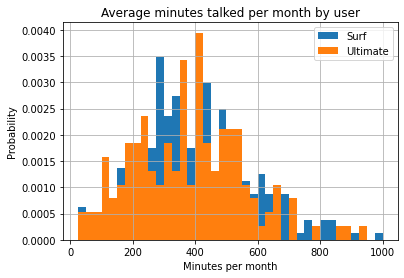

In [27]:
plt.figure()
(user_duration.loc[user_duration['plan'] == 'surf', 'mean']).hist(bins=[0 + 25*i for i in range(1,41)], density=True)
user_duration.loc[user_duration['plan'] == 'ultimate', 'mean'].hist(bins=[0 + 25*i for i in range(1,41)], density=True)
plt.legend(['Surf', 'Ultimate'])
plt.title('Average minutes talked per month by user')
plt.xlabel('Minutes per month')
plt.ylabel('Probability')
plt.show()

The graph above display the density distribution of minutes talked per month for users, for each plan. The distributions as similar to normal distributions and do not differ much between plans.

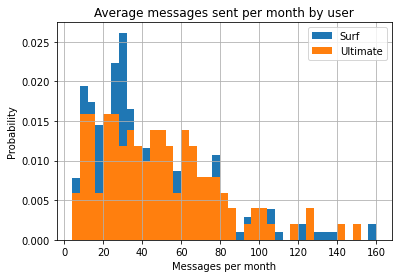

In [28]:
plt.figure()
user_messages.loc[user_messages['plan'] == 'surf', 'mean'].hist(bins=[0 + 4*i for i in range(1,41)], density=True)
user_messages.loc[user_messages['plan'] == 'ultimate', 'mean'].hist(bins=[0 + 4*i for i in range(1,41)], density=True)
plt.legend(['Surf', 'Ultimate'])
plt.title('Average messages sent per month by user')
plt.xlabel('Messages per month')
plt.ylabel('Probability')
plt.show()

Looking at the density histogram messages, we hardly see a peak in probabilities of messages per month for Ultimate users, while Surf users have a peak at low values of messages per month. Therefore, we expect that Ultimate users have a higher probability of using more messages per month, because of the positive skew.

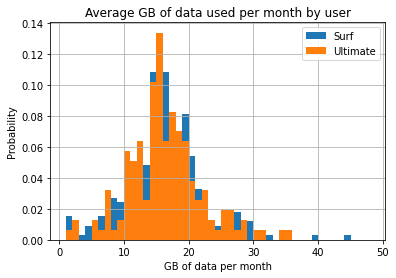

In [29]:
plt.figure()
user_internet.loc[user_internet['plan'] == 'surf', 'mean'].hist(bins=[0 + 1*i for i in range(1,49)], density=True)
user_internet.loc[user_internet['plan'] == 'ultimate', 'mean'].hist(bins=[0 + 1*i for i in range(1,49)], density=True)
plt.legend(['Surf', 'Ultimate'])
plt.title('Average GB of data used per month by user')
plt.xlabel('GB of data per month')
plt.ylabel('Probability')
plt.show()

For the probabilities of data used per month, there isn't a relative skew for any of the plans. We expect users for each plans to generally use the same ammount per month.

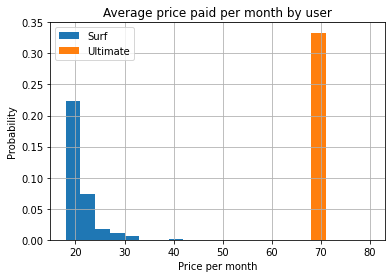

In [30]:
plt.figure()
user_paid.loc[user_paid['plan'] == 'surf', 'mean'].hist(bins=[15 + 3*i for i in range(1,21)], density=True)
user_paid.loc[user_paid['plan'] == 'ultimate', 'mean'].hist(bins=[20 + 3*i for i in range(1,21)], density=True)
plt.legend(['Surf', 'Ultimate'])
plt.title('Average price paid per month by user')
plt.xlabel('Price per month')
plt.ylabel('Probability')
plt.show()

Finally, the distribution of prices between plans look nothing alike. By taking a look at the density for average price paid per plan, we can see all users of Ultimate generally only pay the plan price without exceeding limits. While most of the users of Surf won't pay more than $25, their monthly bills show some variance.

#### Results

With the exception of prices, all of the graphs show similar distributions. That strengthens the hypothesis that users in Surf have similar usage of services when compared to Ultimate. This is something to look out for: why these customers prefer ultimate? This should be discussed in the conclusion of this section.

### Location comparison

#### Explanation

Here we will make a quick comparison between users in NY-NJ states compared to the rest of the states. This could give us another insight on how important is location for these statistics.

#### Code

In [31]:
wordnet_lemma = WordNetLemmatizer()
english_stem = SnowballStemmer('english')
users['token'] = users['city'].apply(nltk.word_tokenize)

NY_list = []
for row in users['token']:
    if 'NY-NJ-PA' in row:
        NY_list.append(True)
    else:
        NY_list.append(False)

users = users.join(pd.Series(NY_list, name='NY_list'))

In [32]:
user_paid = user_paid.join(users.set_index('user_id')['NY_list'])

In [33]:
user_paid.pivot_table(index='plan', columns='NY_list', values='mean', aggfunc=['count', 'mean', np.std, np.var])

count             mean                  std                 var  \
NY_list  False True       False      True      False     True      False   
plan                                                                       
surf       279    60  21.382185  21.529715  2.527779  2.501824  6.389667   
ultimate   141    20  70.000000  70.000000  0.000000  0.000000  0.000000   

                    
NY_list      True   
plan                
surf      6.259124  
ultimate  0.000000

#### Results

In this quick section, we checked the indexes. For these samples of users, we could check that NY-NJ residents have higher rates of adherison to the Surf plan.

### Overall Conclusion

We created a few hypothesis in this analysis. We could check that for this sample most Ultimate users would probably be happy just using Surf plan. Maybe the Ultimate plan users have additional benefits that are not included in rates, or they simply like the comfort of being able to spend a lot of minutes, text messages and gigabytes. On the other hand, they could just be misinformed, and that could mean a liability. After all, that opens space for the competition to offer better plans. In the next section, we will make a statistical analysis to test hypothesis. However, it's very clear that Ultimate users spend much more money on average than Surf users.

## Hypothesis Testing

### Introduction

In this section, we will group data samples and test them statistically to check their validity and relevance. Hypothesis testing using data can only be used to clarify whether we can reject a null hyphothesis or we just don't have enough information to do it. A null hypothesis is an assumption considered true until proven wrong, that a quantity to be measured is zero. This quantity is the probability that the arrays of samples provided derive from different batchets. If such null hypothesis is proven wrong, then we can validate an alternative hypothesis. We will do it to attest whether our assumptions in the analysis section are incorrect.

### Testing

#### Explanation

We will test two hypotheses:

Question 1: Do users in both plans have different patterns regarding calls, messages and data rates? 
- *The null hypothesis:* Users have the same patterns regardless of the plan. 
- *The alternative hypothesis:* Users have different patterns depending on the plan. 

Question 2: Do users in NY have different monthly bill prices when compared to other regions?
- *The null hypothesis:* Monthly expenses of NY users are similar to those of users all in other locations. 
- *The alternative hypothesis:* Monthly expenses of NY users are specific and patterns are different from those of users in other locations. 

When comparing probabilities, we will use a probability reference value of 10% to tell whether a statement can be rejected or not, because our dataset is considerably reduced. Additionally, the data analysis led us to strong expectations, so we can set the bar higher.

#### Code

In [34]:
import scipy.stats as st

alpha = 0.1

In [35]:
print('Testing duration by plan...')
test_duration = user_duration.pivot_table(index=user_duration.index, values='mean', columns='plan')
array1 = test_duration[test_duration['surf'].notna()]['surf'].values
array2 = test_duration[test_duration['ultimate'].notna()]['ultimate'].values
result = st.ttest_ind(array1, array2, equal_var=True)

print(f"P-value: {result.pvalue}")
print(f"Probability: {result.pvalue:.2%}")
if result.pvalue > alpha:
    print(f"It is too high, so both sets are likely to have come from the same population (null hypothesis can't be rejected).")
else:
    print(f"It is too low, so we have evidence that both sets are not from the the same population (null hypothesis rejected).")

Testing duration by plan...
P-value: 0.4721151053891024
Probability: 47.21%
It is too high, so both sets are likely to have come from the same population (null hypothesis can't be rejected).


In [36]:
print('Testing messages by plan...')
test_messages = user_messages.pivot_table(index=user_messages.index, values='mean', columns='plan')
array1 = test_messages[test_messages['surf'].notna()]['surf'].values
array2 = test_messages[test_messages['ultimate'].notna()]['ultimate'].values
result = st.ttest_ind(array1, array2, equal_var=True)

print(f"P-value: {result.pvalue}")
print(f"Probability: {result.pvalue:.2%}", )
if result.pvalue > alpha:
    print(f"It is too high, so both sets are likely to have come from the same population (null hypothesis can't be rejected).")
else:
    print(f"It is too low, so we have evidence that both sets are not from the the same population (null hypothesis rejected).")

Testing messages by plan...
P-value: 0.07680266663598279
Probability: 7.68%
It is too low, so we have evidence that both sets are not from the the same population (null hypothesis rejected).


In [37]:
print('Testing data rates by plan...')
test_internet = user_internet.pivot_table(index=user_internet.index, values='mean', columns='plan')
array1 = test_internet[test_internet['surf'].notna()]['surf'].values
array2 = test_internet[test_internet['ultimate'].notna()]['ultimate'].values
result = st.ttest_ind(array1, array2, equal_var=True)

print(f"P-value: {result.pvalue}")
print(f"Probability: {result.pvalue:.2%}", )
if result.pvalue > alpha:
    print(f"It is too high, so both sets are likely to have come from the same population (null hypothesis can't be rejected).")
else:
    print(f"It is too low, so we have evidence that both sets are not from the the same population (null hypothesis rejected).")

Testing data rates by plan...
P-value: 0.8857578045461794
Probability: 88.58%
It is too high, so both sets are likely to have come from the same population (null hypothesis can't be rejected).


In [38]:
print('Testing revenue by location...')

array1 = user_paid.query('NY_list == True and plan == "surf"')['mean'].values
array2 = user_paid.query('NY_list == False and plan == "surf"')['mean'].values

result = st.ttest_ind(array1, array2, equal_var=False)

print(f"P-value: {result.pvalue}")
print(f"Probability: {result.pvalue:.2%}", )
if result.pvalue > alpha:
    print(f"It is too high, so both sets are likely to have come from the same population (null hypothesis can't be rejected).")
else:
    print(f"It is too low, so we have evidence that both sets are not from the the same population (null hypothesis rejected).")

Testing revenue by location...
P-value: 0.680172635994667
Probability: 68.02%
It is too high, so both sets are likely to have come from the same population (null hypothesis can't be rejected).


#### Results

The test we have made calculates the probability of arrays being samples of the same dataset. Using the T-test for on the equality of two population means, we can check if two sets of data are not from the same population (p-value lower than threshold). The probabilities and the only null hypothesis we could reject is that message patterns from users in 'Surf' and 'Ultimate' are the same. That means patterns of calls, internet usage and monthly bills are the same independetly on the plan. Additionally, there is no significant differences in the average revenue from users in NY-NJ area, when compared to other regions.

### Conclusion

After our calculations, we can say our hypothesis were reasonable and should be taken into account. When comparing users of both plans, patterns in usage of services were only different regarding messages, we can't conclude they are different for other stats such as duration of call in minutes and data rates in gigabytes. Additionally, we don't have evident to support the hypothesis that average data about NY customers is different from other regions, so location doesn't prove itself a main topic of interest.

## Overall Conclusion

Our objective in this research was to outline patterns in consumers for plans Surf and Ultimate of Megaline Company. This information can prove itself useful for the marketing team to design they next campaign.

We got details about 500 users, containing mostly correct data and minimal issues. After preprocessing the data, we did the exploratory data analysis, plotted histograms, and came to the following conclusions about the data in this sample: 

- Location is not a significant matter of research regarding patterns of usage in services.
- The Ultimate plan is more profitable in regards to average price paid per user and in total revenues.
- Users in plans Surf and Ultimate have mostly the same needs in quantity of call duration and internet data rates used.
- Ultimate users generally use messages service considerably more often than Surf users do.

These results were statistically tested and validated.

Lastly, this research shows relevant information about the patterns of users in each plan. We have found out that users of Ultimate practically do not exceed their usage limits and that they could save money for the same service had they registered on Surf, although Ultimate could still have other benefits that our team has not been informed for the present analysis.